# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [228]:
import matplotlib.pyplot as plt


In [229]:
import numpy as np
import pandas as pd

In [266]:
data = pd.read_csv("CarPrice_Assignment.csv",index_col=['car_ID'])

In [267]:
data

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


In [268]:
data2=data['CarName']
data2

car_ID
1            alfa-romero giulia
2           alfa-romero stelvio
3      alfa-romero Quadrifoglio
4                   audi 100 ls
5                    audi 100ls
                 ...           
201             volvo 145e (sw)
202                 volvo 144ea
203                 volvo 244dl
204                   volvo 246
205                 volvo 264gl
Name: CarName, Length: 205, dtype: object

In [269]:
data2=data2.map(lambda x: x.split(' ')[0])

In [270]:
data=data.drop(['CarName'],axis=1)
data

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


In [271]:
data.insert(loc=1,column='CarCompany',value=data2)


In [272]:
data

,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


In [273]:
data=data.replace({'CarCompany':{'maxda':'mazda','Nissan':'nissan','porcshce':'porsche','toyouta':'toyota','vw':'volkswagen','vokswagen':'volkswagen'}})
data=data.replace({'doornumber':{'one':1,'two':2,'three':3,'four':4,'five':5,'six':6,'seven':7,'eight':8,'nine':9,'twelve':12}})
data=data.replace({'cylindernumber':{'one':1,'two':2,'three':3,'four':4,'five':5,'six':6,'seven':7,'eight':8,'nine':9,'twelve':12}})

In [274]:
data

,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,volvo,gas,std,4,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,volvo,gas,turbo,4,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,volvo,gas,std,4,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


In [275]:
data = data.sample(frac=1, random_state=10).reset_index(drop=True)



In [276]:
data

,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,2,renault,gas,std,2,hatchback,fwd,front,96.1,176.8,...,132,mpfi,3.46,3.900,8.7,90,5100,23,31,9895.000
1,0,peugeot,gas,turbo,4,sedan,rwd,front,108.0,186.7,...,134,mpfi,3.61,3.210,7.0,142,5600,18,24,18150.000
2,0,mazda,diesel,std,4,sedan,fwd,front,98.8,177.8,...,122,idi,3.39,3.390,22.7,64,4650,36,42,10795.000
3,3,mazda,gas,std,2,hatchback,rwd,front,95.3,169.0,...,70,4bbl,3.33,3.255,9.4,101,6000,17,23,11845.000
4,0,jaguar,gas,std,2,sedan,rwd,front,102.0,191.7,...,326,mpfi,3.54,2.760,11.5,262,5000,13,17,36000.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,peugeot,gas,std,4,wagon,rwd,front,114.2,198.9,...,120,mpfi,3.46,2.190,8.4,95,5000,19,24,16695.000
201,0,mazda,gas,std,4,hatchback,fwd,front,98.8,177.8,...,122,2bbl,3.39,3.390,8.6,84,4800,26,32,11245.000
202,0,bmw,gas,std,4,sedan,rwd,front,103.5,189.0,...,209,mpfi,3.62,3.390,8.0,182,5400,16,22,30760.000
203,3,porsche,gas,std,2,hatchback,rwd,front,94.5,168.9,...,151,mpfi,3.94,3.110,9.5,143,5500,19,27,22018.000


In [277]:
data=pd.get_dummies(data,columns=['CarCompany','fueltype', 'aspiration',
       'carbody', 'drivewheel', 'enginelocation','enginetype','fuelsystem'])

In [278]:
data

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,2,2,96.1,176.8,66.6,50.5,2460,4,132,3.46,...,0,0,0,0,0,0,0,1,0,0
1,0,4,108.0,186.7,68.3,56.0,3130,4,134,3.61,...,0,0,0,0,0,0,0,1,0,0
2,0,4,98.8,177.8,66.5,55.5,2443,4,122,3.39,...,0,0,0,0,0,1,0,0,0,0
3,3,2,95.3,169.0,65.7,49.6,2380,2,70,3.33,...,0,1,0,0,1,0,0,0,0,0
4,0,2,102.0,191.7,70.6,47.8,3950,12,326,3.54,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,4,114.2,198.9,68.4,56.7,3285,4,120,3.46,...,0,0,0,0,0,0,0,1,0,0
201,0,4,98.8,177.8,66.5,55.5,2425,4,122,3.39,...,0,0,0,1,0,0,0,0,0,0
202,0,4,103.5,189.0,66.9,55.7,3230,6,209,3.62,...,0,0,0,0,0,0,0,1,0,0
203,3,2,94.5,168.9,68.3,50.2,2778,4,151,3.94,...,0,0,0,0,0,0,0,1,0,0


In [279]:
train_data = data.iloc[:144,]
test_data = data.iloc[144:205,]

In [280]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [281]:
train_data

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0.884243,-1.053511,-0.492993,0.177723,0.275880,-1.258418,-0.248512,-0.352389,0.095446,0.436269,...,-0.257301,-0.145358,-0.207789,-0.618017,-0.118265,-0.376650,-0.083333,1.053511,-0.241692,-0.083333
1,-0.668574,0.942615,1.611098,1.031081,1.108621,1.033825,1.045555,-0.352389,0.146539,0.987668,...,-0.257301,-0.145358,-0.207789,-0.618017,-0.118265,-0.376650,-0.083333,1.053511,-0.241692,-0.083333
2,-0.668574,0.942615,-0.015594,0.263921,0.226895,0.825439,-0.281347,-0.352389,-0.160022,0.178949,...,-0.257301,-0.145358,-0.207789,-0.618017,-0.118265,2.636549,-0.083333,-0.942615,-0.241692,-0.083333
3,1.660652,-1.053511,-0.634444,-0.494620,-0.164984,-1.633513,-0.403028,-2.197627,-1.488457,-0.041610,...,-0.257301,6.831809,-0.207789,-0.618017,8.396841,-0.376650,-0.083333,-0.942615,-0.241692,-0.083333
4,-0.668574,-1.053511,0.550212,1.462070,2.235272,-2.383702,2.629339,7.028562,5.051530,0.730349,...,3.859512,-0.145358,-0.207789,-0.618017,-0.118265,-0.376650,-0.083333,1.053511,-0.241692,-0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.884243,0.942615,0.090495,0.160483,0.177910,0.325313,0.454533,0.570230,0.197633,-0.556250,...,-0.257301,-0.145358,-0.207789,-0.618017,-0.118265,-0.376650,-0.083333,1.053511,-0.241692,-0.083333
140,0.884243,0.942615,0.037450,1.022461,0.226895,1.075502,0.205377,-0.352389,-0.185569,0.730349,...,-0.257301,-0.145358,-0.207789,-0.618017,-0.118265,-0.376650,-0.083333,1.053511,-0.241692,-0.083333
141,0.107835,-1.053511,-0.775896,-1.623810,-1.193664,-0.633261,-1.380339,-0.352389,-0.977521,-1.144409,...,-0.257301,-0.145358,-0.207789,1.606843,-0.118265,-0.376650,-0.083333,-0.942615,-0.241692,-0.083333
142,0.107835,0.942615,-0.775896,-0.813551,-1.095695,0.408668,-1.192989,-0.352389,-0.798693,-0.703289,...,-0.257301,-0.145358,-0.207789,1.606843,-0.118265,-0.376650,-0.083333,-0.942615,-0.241692,-0.083333


In [283]:
train_data.shape


(144, 68)

In [284]:
test_data.shape

(61, 68)

In [285]:
train_data['price']

0     -0.465534
1      0.663866
2     -0.342401
3     -0.198747
4      3.105997
         ...   
139    0.568096
140   -0.154282
141   -0.599407
142   -0.793341
143    0.335512
Name: price, Length: 144, dtype: float64

In [286]:
train_labels=train_data['price']
test_labels=test_data['price']

In [287]:
train_data.drop(['price'],axis=1)


,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0.884243,-1.053511,-0.492993,0.177723,0.275880,-1.258418,-0.248512,-0.352389,0.095446,0.436269,...,-0.257301,-0.145358,-0.207789,-0.618017,-0.118265,-0.376650,-0.083333,1.053511,-0.241692,-0.083333
1,-0.668574,0.942615,1.611098,1.031081,1.108621,1.033825,1.045555,-0.352389,0.146539,0.987668,...,-0.257301,-0.145358,-0.207789,-0.618017,-0.118265,-0.376650,-0.083333,1.053511,-0.241692,-0.083333
2,-0.668574,0.942615,-0.015594,0.263921,0.226895,0.825439,-0.281347,-0.352389,-0.160022,0.178949,...,-0.257301,-0.145358,-0.207789,-0.618017,-0.118265,2.636549,-0.083333,-0.942615,-0.241692,-0.083333
3,1.660652,-1.053511,-0.634444,-0.494620,-0.164984,-1.633513,-0.403028,-2.197627,-1.488457,-0.041610,...,-0.257301,6.831809,-0.207789,-0.618017,8.396841,-0.376650,-0.083333,-0.942615,-0.241692,-0.083333
4,-0.668574,-1.053511,0.550212,1.462070,2.235272,-2.383702,2.629339,7.028562,5.051530,0.730349,...,3.859512,-0.145358,-0.207789,-0.618017,-0.118265,-0.376650,-0.083333,1.053511,-0.241692,-0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.884243,0.942615,0.090495,0.160483,0.177910,0.325313,0.454533,0.570230,0.197633,-0.556250,...,-0.257301,-0.145358,-0.207789,-0.618017,-0.118265,-0.376650,-0.083333,1.053511,-0.241692,-0.083333
140,0.884243,0.942615,0.037450,1.022461,0.226895,1.075502,0.205377,-0.352389,-0.185569,0.730349,...,-0.257301,-0.145358,-0.207789,-0.618017,-0.118265,-0.376650,-0.083333,1.053511,-0.241692,-0.083333
141,0.107835,-1.053511,-0.775896,-1.623810,-1.193664,-0.633261,-1.380339,-0.352389,-0.977521,-1.144409,...,-0.257301,-0.145358,-0.207789,1.606843,-0.118265,-0.376650,-0.083333,-0.942615,-0.241692,-0.083333
142,0.107835,0.942615,-0.775896,-0.813551,-1.095695,0.408668,-1.192989,-0.352389,-0.798693,-0.703289,...,-0.257301,-0.145358,-0.207789,1.606843,-0.118265,-0.376650,-0.083333,-0.942615,-0.241692,-0.083333


In [288]:
test_data.drop(['price'],axis=1)

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
144,-1.444983,0.942615,0.780071,-0.011912,-0.703816,2.617557,-0.103654,-0.352389,-0.160022,-0.004850,...,-0.257301,-0.145358,-0.207789,1.606843,-0.118265,-0.37665,-0.083333,-0.942615,-0.241692,-0.083333
145,0.884243,0.942615,0.037450,1.022461,0.226895,1.075502,0.327058,-0.352389,-0.185569,0.730349,...,-0.257301,-0.145358,-0.207789,-0.618017,-0.118265,-0.37665,-0.083333,1.053511,-0.241692,-0.083333
146,-0.668574,0.942615,-0.333860,-0.236026,-0.311938,0.325313,-0.151940,-0.352389,-0.517678,1.024428,...,-0.257301,-0.145358,-0.207789,-0.618017,-0.118265,-0.37665,-0.083333,1.053511,-0.241692,-0.083333
147,-0.668574,0.942615,-0.563719,-0.434281,-1.193664,2.325817,1.006926,-0.352389,-0.926427,-1.070889,...,-0.257301,-0.145358,-0.207789,1.606843,-0.118265,-0.37665,-0.083333,-0.942615,-0.241692,-0.083333
148,0.884243,0.942615,-0.280816,-0.261886,-0.262953,0.908793,-0.727511,-0.352389,-0.492131,-0.556250,...,-0.257301,-0.145358,-0.207789,-0.618017,-0.118265,-0.37665,-0.083333,1.053511,-0.241692,-0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-0.668574,0.942615,2.707347,2.082693,1.157606,1.325565,1.344929,-0.352389,-0.211116,0.436269,...,-0.257301,-0.145358,-0.207789,-0.618017,-0.118265,-0.37665,-0.083333,1.053511,-0.241692,-0.083333
201,-0.668574,0.942615,-0.015594,0.263921,0.226895,0.825439,-0.316113,-0.352389,-0.160022,0.178949,...,-0.257301,-0.145358,-0.207789,1.606843,-0.118265,-0.37665,-0.083333,-0.942615,-0.241692,-0.083333
202,-0.668574,0.942615,0.815434,1.229336,0.422834,0.908793,1.238699,1.492849,2.062551,1.024428,...,-0.257301,-0.145358,-0.207789,-0.618017,-0.118265,-0.37665,-0.083333,1.053511,-0.241692,-0.083333
203,1.660652,-1.053511,-0.775896,-0.503239,1.108621,-1.383450,0.365687,-0.352389,0.580835,2.200747,...,-0.257301,-0.145358,-0.207789,-0.618017,-0.118265,-0.37665,-0.083333,1.053511,-0.241692,-0.083333


In [290]:
test_data.isnull().all().values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [291]:
from tensorflow.keras import models
from tensorflow.keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(68, activation='relu',
    input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dense(6, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [292]:
k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_labels = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_labels = np.concatenate([train_labels[:i * num_val_samples],train_labels[(i + 1) * num_val_samples:]],axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_labels,
    epochs=num_epochs, batch_size=1, verbose=1)
    val_mse, val_mae = model.evaluate(val_data, val_labels, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
Epoch 1/100
108/108 [==============================] - 0s 1ms/step - loss: 0.8744 - mae: 0.7338
Epoch 2/100
108/108 [==============================] - 0s 936us/step - loss: 0.3410 - mae: 0.4189
Epoch 3/100
108/108 [==============================] - 0s 945us/step - loss: 0.1206 - mae: 0.2325
Epoch 4/100
108/108 [==============================] - 0s 946us/step - loss: 0.0485 - mae: 0.1541
Epoch 5/100
108/108 [==============================] - 0s 964us/step - loss: 0.0373 - mae: 0.1417
Epoch 6/100
108/108 [==============================] - 0s 982us/step - loss: 0.0450 - mae: 0.1523
Epoch 7/100
108/108 [==============================] - 0s 834us/step - loss: 0.0271 - mae: 0.1153
Epoch 8/100
108/108 [==============================] - 0s 945us/step - loss: 0.0277 - mae: 0.1152
Epoch 9/100
108/108 [==============================] - 0s 936us/step - loss: 0.0219 - mae: 0.1076
Epoch 10/100
108/108 [==============================] - 0s 1ms/step - loss: 0.0304 - mae: 0.1220
Epo

108/108 [==============================] - 0s 1ms/step - loss: 0.0069 - mae: 0.0553
Epoch 85/100
108/108 [==============================] - 0s 899us/step - loss: 0.0064 - mae: 0.0514
Epoch 86/100
108/108 [==============================] - 0s 862us/step - loss: 0.0061 - mae: 0.0485
Epoch 87/100
108/108 [==============================] - 0s 890us/step - loss: 0.0070 - mae: 0.0491
Epoch 88/100
108/108 [==============================] - 0s 871us/step - loss: 0.0069 - mae: 0.0520
Epoch 89/100
108/108 [==============================] - 0s 899us/step - loss: 0.0057 - mae: 0.0467
Epoch 90/100
108/108 [==============================] - 0s 890us/step - loss: 0.0076 - mae: 0.0500
Epoch 91/100
108/108 [==============================] - 0s 769us/step - loss: 0.0096 - mae: 0.0541
Epoch 92/100
108/108 [==============================] - 0s 890us/step - loss: 0.0065 - mae: 0.0503
Epoch 93/100
108/108 [==============================] - 0s 853us/step - loss: 0.0041 - mae: 0.0429
Epoch 94/100
108/108 [===

108/108 [==============================] - 0s 1ms/step - loss: 0.0065 - mae: 0.0512
Epoch 68/100
108/108 [==============================] - 0s 1ms/step - loss: 0.0086 - mae: 0.0567
Epoch 69/100
108/108 [==============================] - 0s 927us/step - loss: 0.0097 - mae: 0.0595
Epoch 70/100
108/108 [==============================] - 0s 899us/step - loss: 0.0093 - mae: 0.0593
Epoch 71/100
108/108 [==============================] - 0s 890us/step - loss: 0.0119 - mae: 0.0621
Epoch 72/100
108/108 [==============================] - 0s 880us/step - loss: 0.0060 - mae: 0.0490
Epoch 73/100
108/108 [==============================] - 0s 871us/step - loss: 0.0066 - mae: 0.0543
Epoch 74/100
108/108 [==============================] - 0s 862us/step - loss: 0.0096 - mae: 0.0582
Epoch 75/100
108/108 [==============================] - 0s 1ms/step - loss: 0.0082 - mae: 0.0575
Epoch 76/100
108/108 [==============================] - 0s 1ms/step - loss: 0.0069 - mae: 0.0532
Epoch 77/100
108/108 [=========

108/108 [==============================] - 0s 2ms/step - loss: 0.0108 - mae: 0.0707
Epoch 51/100
108/108 [==============================] - 0s 1ms/step - loss: 0.0139 - mae: 0.0774
Epoch 52/100
108/108 [==============================] - 0s 908us/step - loss: 0.0171 - mae: 0.0788
Epoch 53/100
108/108 [==============================] - 0s 853us/step - loss: 0.0130 - mae: 0.0717
Epoch 54/100
108/108 [==============================] - 0s 890us/step - loss: 0.0131 - mae: 0.0679
Epoch 55/100
108/108 [==============================] - 0s 1ms/step - loss: 0.0125 - mae: 0.0762
Epoch 56/100
108/108 [==============================] - 0s 899us/step - loss: 0.0142 - mae: 0.0719
Epoch 57/100
108/108 [==============================] - 0s 862us/step - loss: 0.0099 - mae: 0.0665
Epoch 58/100
108/108 [==============================] - 0s 908us/step - loss: 0.0138 - mae: 0.0699
Epoch 59/100
108/108 [==============================] - 0s 908us/step - loss: 0.0115 - mae: 0.0743
Epoch 60/100
108/108 [=======

108/108 [==============================] - 0s 1ms/step - loss: 0.3514 - mae: 0.2746
Epoch 33/100
108/108 [==============================] - 0s 899us/step - loss: 0.3410 - mae: 0.2696
Epoch 34/100
108/108 [==============================] - 0s 982us/step - loss: 0.3320 - mae: 0.2639
Epoch 35/100
108/108 [==============================] - 0s 853us/step - loss: 0.3186 - mae: 0.2571
Epoch 36/100
108/108 [==============================] - 0s 853us/step - loss: 0.3084 - mae: 0.2599
Epoch 37/100
108/108 [==============================] - 0s 908us/step - loss: 0.2986 - mae: 0.2486
Epoch 38/100
108/108 [==============================] - 0s 899us/step - loss: 0.2900 - mae: 0.2492
Epoch 39/100
108/108 [==============================] - 0s 955us/step - loss: 0.2794 - mae: 0.2397
Epoch 40/100
108/108 [==============================] - 0s 936us/step - loss: 0.2746 - mae: 0.2443
Epoch 41/100
108/108 [==============================] - 0s 982us/step - loss: 0.2601 - mae: 0.2321
Epoch 42/100
108/108 [===

In [293]:
all_scores

[0.1572517454624176,
 0.1985819935798645,
 0.23034453392028809,
 0.2783997058868408]

In [298]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_labels = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_labels = np.concatenate([train_labels[:i * num_val_samples],train_labels[(i + 1) * num_val_samples:]],axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_labels,
    validation_data=(val_data, val_labels),
    epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [300]:
all_mae_histories

[[0.5498487949371338,
  0.3699466586112976,
  0.30723780393600464,
  0.3148411214351654,
  0.3123703598976135,
  0.3159884214401245,
  0.3374239206314087,
  0.37262487411499023,
  0.4036184847354889,
  0.2909040153026581,
  0.3632112741470337,
  0.31035715341567993,
  0.29149696230888367,
  0.3659452199935913,
  0.3697476387023926,
  0.31413498520851135,
  0.31461843848228455,
  0.3003288507461548,
  0.31301000714302063,
  0.3193035125732422,
  0.29883873462677,
  0.34051620960235596,
  0.3036893904209137,
  0.3137162923812866,
  0.33725759387016296,
  0.3702484369277954,
  0.32981041073799133,
  0.3020225763320923,
  0.32180964946746826,
  0.31484538316726685,
  0.29878902435302734,
  0.32307207584381104,
  0.307944655418396,
  0.3259757161140442,
  0.3199417293071747,
  0.30225589871406555,
  0.31101810932159424,
  0.302293062210083,
  0.26269495487213135,
  0.28431785106658936,
  0.3051643371582031,
  0.27367502450942993,
  0.257789671421051,
  0.28537267446517944,
  0.2508730888366

In [301]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

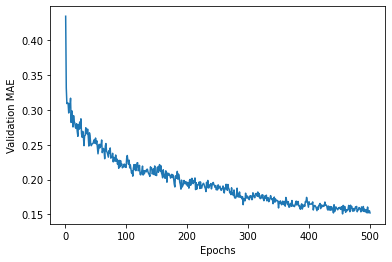

In [302]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

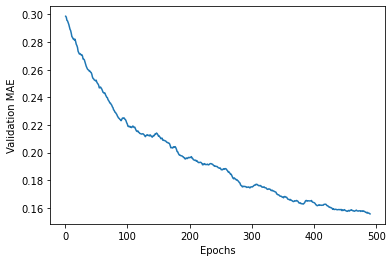

In [303]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points


smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [317]:
model = build_model()
model.fit(train_data, train_labels,epochs=500, batch_size=20, verbose=1)


Epoch 1/500
8/8 [==============================] - 0s 3ms/step - loss: 1.4191 - mae: 0.8786
Epoch 2/500
8/8 [==============================] - 0s 2ms/step - loss: 0.7414 - mae: 0.5972
Epoch 3/500
8/8 [==============================] - 0s 2ms/step - loss: 0.5532 - mae: 0.4905
Epoch 4/500
8/8 [==============================] - 0s 2ms/step - loss: 0.4175 - mae: 0.4106
Epoch 5/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3162 - mae: 0.3472
Epoch 6/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2308 - mae: 0.3029
Epoch 7/500
8/8 [==============================] - 0s 3ms/step - loss: 0.1754 - mae: 0.2563
Epoch 8/500
8/8 [==============================] - 0s 2ms/step - loss: 0.1359 - mae: 0.2297
Epoch 9/500
8/8 [==============================] - 0s 2ms/step - loss: 0.1096 - mae: 0.2114
Epoch 10/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0843 - mae: 0.1840
Epoch 11/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0651 

8/8 [==============================] - 0s 2ms/step - loss: 0.0084 - mae: 0.0592
Epoch 89/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0055 - mae: 0.0511
Epoch 90/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0071 - mae: 0.0577
Epoch 91/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0070 - mae: 0.0606
Epoch 92/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0074 - mae: 0.0615
Epoch 93/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0071 - mae: 0.0589
Epoch 94/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0073 - mae: 0.0600
Epoch 95/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0071 - mae: 0.0587
Epoch 96/500
8/8 [==============================] - ETA: 0s - loss: 0.0096 - mae: 0.066 - 0s 2ms/step - loss: 0.0060 - mae: 0.0549
Epoch 97/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0085 - mae: 0.0653
Epoch 98/500
8/8 [===========================

8/8 [==============================] - 0s 2ms/step - loss: 0.0040 - mae: 0.0420
Epoch 175/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0038 - mae: 0.0428
Epoch 176/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0034 - mae: 0.0396
Epoch 177/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0052 - mae: 0.0504
Epoch 178/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0037 - mae: 0.0408
Epoch 179/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0049 - mae: 0.0493
Epoch 180/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0044 - mae: 0.0438
Epoch 181/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0037 - mae: 0.0411
Epoch 182/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0046 - mae: 0.0489
Epoch 183/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0040 - mae: 0.0419
Epoch 184/500
8/8 [==============================] - 0s 2ms/step - loss: 0

8/8 [==============================] - 0s 2ms/step - loss: 0.0033 - mae: 0.0385
Epoch 261/500
8/8 [==============================] - ETA: 0s - loss: 0.0036 - mae: 0.051 - 0s 2ms/step - loss: 0.0023 - mae: 0.0344
Epoch 262/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0032 - mae: 0.0379
Epoch 263/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0021 - mae: 0.0306
Epoch 264/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0047 - mae: 0.0459
Epoch 265/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0025 - mae: 0.0353
Epoch 266/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0022 - mae: 0.0322
Epoch 267/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0022 - mae: 0.0313
Epoch 268/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0031 - mae: 0.0385
Epoch 269/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0026 - mae: 0.0369
Epoch 270/500
8/8 [=================

8/8 [==============================] - 0s 2ms/step - loss: 0.0026 - mae: 0.0334
Epoch 347/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0018 - mae: 0.0286
Epoch 348/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0018 - mae: 0.0296
Epoch 349/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0025 - mae: 0.0336
Epoch 350/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0024 - mae: 0.0294
Epoch 351/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0014 - mae: 0.0262
Epoch 352/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0023 - mae: 0.0320
Epoch 353/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0022 - mae: 0.0323
Epoch 354/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0013 - mae: 0.0260
Epoch 355/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0036 - mae: 0.0390
Epoch 356/500
8/8 [==============================] - 0s 2ms/step - loss: 0

8/8 [==============================] - 0s 2ms/step - loss: 0.0010 - mae: 0.0224
Epoch 434/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0026 - mae: 0.0321
Epoch 435/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0019 - mae: 0.0291
Epoch 436/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0015 - mae: 0.0279
Epoch 437/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0022 - mae: 0.0307
Epoch 438/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0015 - mae: 0.0267
Epoch 439/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0015 - mae: 0.0271
Epoch 440/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0014 - mae: 0.0260
Epoch 441/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0016 - mae: 0.0266
Epoch 442/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0020 - mae: 0.0299
Epoch 443/500
8/8 [==============================] - 0s 2ms/step - loss: 0

In [318]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)

2/2 [==============================] - 0s 0s/step - loss: 0.0316 - mae: 0.1302


In [319]:
test_mae_score

0.13024266064167023

In [354]:
predicted_values=model.predict(test_data)
print(predicted_values.shape)
predicted_values=predicted_values.ravel()

(61, 1)


In [357]:

list(test_labels)

[-0.5987910318056703,
 0.3026769160107283,
 -0.2789197217442437,
 -0.6183554446965104,
 -0.6981180510976274,
 2.8575429742173495,
 -1.0569813728645743,
 -0.675817356683593,
 1.1201410210650586,
 0.7281686928674592,
 4.392049652424775,
 -0.5202597520899908,
 -0.820703463336737,
 -0.9521817905262284,
 -1.0876277259243519,
 0.36944218517667193,
 -0.813862759528751,
 -1.1145800989278167,
 -0.6484545414516488,
 -0.8212507196413759,
 0.04751866397284952,
 -0.881448913151653,
 0.6816519069731543,
 -0.7791119841841819,
 -1.066968800424234,
 -0.7387518317170644,
 -0.9328910057877079,
 -0.6989389355545857,
 -0.8822697976086112,
 -0.8443722985123687,
 2.630978864096852,
 -0.8728296263535905,
 1.0681516721243647,
 -0.9725670878740268,
 -0.6570738282497113,
 -0.2804246765820006,
 -0.45185271401013044,
 -0.9260503019797218,
 -0.4176491949702003,
 -0.7782910997272237,
 -0.19122189892586283,
 -0.5498115925404904,
 -0.8075693120254038,
 -0.8543597260720283,
 -0.5128717919773658,
 3.8331641513123165,
 0

In [359]:
predicted_values=list(predicted_values)
predicted_values

[-0.59961843,
 0.08812523,
 -0.19907789,
 -0.7305941,
 -0.6970427,
 3.00939,
 -1.0674715,
 -0.7862791,
 1.3813375,
 0.6513687,
 4.2905965,
 -0.49782288,
 -0.8856183,
 -0.9156548,
 -0.99714905,
 0.38869244,
 -0.73761845,
 -1.532404,
 -0.7038199,
 -0.8591205,
 -0.30073106,
 -0.9827486,
 0.5718889,
 -0.8112066,
 -0.9555401,
 -0.6774057,
 -1.3285925,
 -0.82872784,
 -0.8310575,
 -0.7808411,
 2.7345688,
 -0.6366368,
 0.99552083,
 -0.96336067,
 -0.67649513,
 -0.43426704,
 -0.5615759,
 -0.93031836,
 -0.5802843,
 -0.87443566,
 -0.30727008,
 -0.7022556,
 -0.8765577,
 -1.0637248,
 -0.5819534,
 3.2394547,
 0.3123857,
 -0.83014876,
 -0.6876652,
 0.15120868,
 3.9298441,
 1.1833657,
 0.39851922,
 -0.8606868,
 -0.71702015,
 -0.5419817,
 0.3584292,
 -0.13605124,
 2.398579,
 0.9707453,
 1.1481476]

In [360]:
MAE=predicted_values-test_values
MAE=list(MAE)

In [365]:
result=pd.DataFrame([predicted_values,test_values,MAE],['predicted_values','test_values','MAE'])

In [366]:
result

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
predicted_values,-0.599618,0.088125,-0.199078,-0.730594,-0.697043,3.009390,-1.067472,-0.786279,1.381338,0.651369,...,1.183366,0.398519,-0.860687,-0.717020,-0.541982,0.358429,-0.136051,2.398579,0.970745,1.148148
test_values,-0.598791,0.302677,-0.278920,-0.618355,-0.698118,2.857543,-1.056981,-0.675817,1.120141,0.728169,...,1.447127,0.485324,-0.834522,-0.870093,-0.598791,0.464802,-0.280835,2.389092,1.193063,0.624076
MAE,-0.000827,-0.214552,0.079842,-0.112239,0.001075,0.151847,-0.010490,-0.110462,0.261197,-0.076800,...,-0.263761,-0.086804,-0.026165,0.153073,0.056809,-0.106372,0.144784,0.009487,-0.222318,0.524072
